<a href="https://colab.research.google.com/github/macscheffer/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')

In [3]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [0]:
df['age_in_2017'] = 2017 - df.year

In [0]:
import numpy as np

df['logprice'] = np.log(df.price)

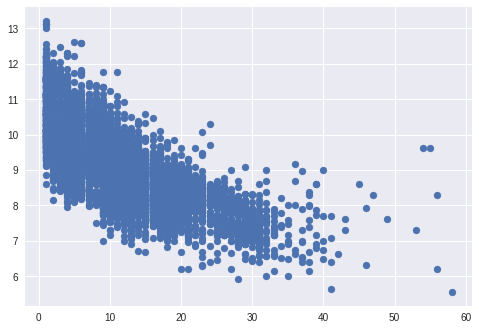

In [15]:
plt.scatter(df.age_in_2017, df.logprice)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
X = df[['age_in_2017']]
y = df['logprice']

X = (X - X.mean()) / X.std()

model = LinearRegression()
model.fit(X, y)

print(model.intercept_, model.coef_)

9.187153601352716 [-0.66986538]


In [31]:
alpha = 0.1 # Step Size
iterations = 20000 # Number of iterations
theta = [0, 0]

X = df[['age_in_2017']]
X = (X - X.mean()) / X.std()
X_linalg = np.c_[np.ones(X.shape[0]), X] 
n = y.size


def gradient_descent(x, y, theta, iterations, alpha):
  for i in range(iterations):
    prediction = np.dot(X_linalg, theta)
    error = prediction - y
    theta = theta - (alpha * (1/n)*np.dot(X_linalg.T, error))
  return theta

final_theta = gradient_descent(X_linalg, y, theta, iterations, alpha)
print("Gradient Descent Results: {:.9f}, {:.14f}".format(final_theta[0], final_theta[1]))

Gradient Descent Results: 9.187153601, -0.66986538118393


 ## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)